In [3]:
import pandas as pd
import numpy as np

# Dataset 1: "bank-additional"
df_bank = pd.read_csv("bank-additional.csv", sep=",")
pd.set_option('display.max_columns', None)
df_bank.head()

Unnamed: 0   age        job  marital    education  default  housing  loan  \
0           0   NaN  housemaid  MARRIED     basic.4y      0.0      0.0   0.0   
1           1  57.0   services  MARRIED  high.school      NaN      0.0   0.0   
2           2  37.0   services  MARRIED  high.school      0.0      1.0   0.0   
3           3  40.0     admin.  MARRIED     basic.6y      0.0      0.0   0.0   
4           4  56.0   services  MARRIED  high.school      0.0      0.0   1.0   

     contact  duration  campaign  pdays  previous     poutcome  emp.var.rate  \
0  telephone       261         1    999         0  NONEXISTENT           1.1   
1  telephone       149         1    999         0  NONEXISTENT           1.1   
2  telephone       226         1    999         0  NONEXISTENT           1.1   
3  telephone       151         1    999         0  NONEXISTENT           1.1   
4  telephone       307         1    999         0  NONEXISTENT           1.1   

  cons.price.idx cons.conf.idx euribor3m nr.employed   y                date  \
0         93,994         -36,4     4,857        5191  no       2-agosto-2019   
1         93,994         -36,4       NaN        5191  no  14-septiembre-2016   
2         93,994         -36,4     4,857        5191  no     15-febrero-2019   
3         93,994         -36,4       NaN        5191  no   29-noviembre-2015   
4         93,994         -36,4       NaN        5191  no       29-enero-2017   

   latitude  longitude                                   id_  
0    41.495    -71.233  089b39d8-e4d0-461b-87d4-814d71e0e079  
1    34.601    -83.923  e9d37224-cb6f-4942-98d7-46672963d097  
2    34.939    -94.847  3f9f49b5-e410-4948-bf6e-f9244f04918b  
3    49.041    -70.308  9991fafb-4447-451a-8be2-b0df6098d13e  
4    38.033   -104.463  eca60b76-70b6-4077-80ba-bc52e8ebb0eb

In [4]:
import pandas as pd
import numpy as np

#Dataset 2: "customer-details" -> Cargamos todas las hojas
df_2012 = pd.read_excel("customer-details.xlsx", sheet_name=0) # Hoja 1
df_2013 = pd.read_excel("customer-details.xlsx", sheet_name=1) # Hoja 2
df_2014 = pd.read_excel("customer-details.xlsx", sheet_name=2) # Hoja 3

# Combinamos todas las hojas en un solo DataFrame
df_customers = pd.concat([df_2012, df_2013, df_2014], ignore_index=True)

pd.set_option('display.max_columns', None)
df_customers.head()

Unnamed: 0  Income  Kidhome  Teenhome Dt_Customer  NumWebVisitsMonth  \
0           0  161770        1         0  2012-04-04                 29   
1           1   85477        1         1  2012-12-30                  7   
2           2  147233        1         1  2012-02-02                  5   
3           3  121393        1         2  2012-12-21                 29   
4           4   63164        1         2  2012-06-20                 20   

                                     ID  
0  089b39d8-e4d0-461b-87d4-814d71e0e079  
1  e9d37224-cb6f-4942-98d7-46672963d097  
2  3f9f49b5-e410-4948-bf6e-f9244f04918b  
3  9991fafb-4447-451a-8be2-b0df6098d13e  
4  eca60b76-70b6-4077-80ba-bc52e8ebb0eb

In [5]:
# Inspecci√≥n inicial de 'bank_additional'
df_bank.info()
df_bank.describe()
df_bank.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx   43000 non-null  object 
 17  euribor3m       33744 non-null 

Unnamed: 0           0
age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

In [6]:
# Observaciones de la inspecci√≥n inicial:

#¬†1. La columna 'Unnamed 0:' probablemente sea un √≠ndice duplicado del CSV. Se puede eliminar.
# 2. Hay valores nulos en muchas columnas.
# 3. Hay columnas num√©ricas que est√°n como tipo 'object' ("job", "marital", "education").
# 4. Las columnas 'age', 'default', 'housing' est√°n como float64 pero representan booleanos (1 o 0).
# 5. Renombrar la columna 'id_' a 'ID' para asegurar que la uni√≥n se realice correctamente m√°s adelante.


# Limpieza y Transformaci√≥n de 'df_bank':

# 1. Eliminar columna innecesaria 'Unnamed: 0'
df_bank.drop(columns=["Unnamed: 0"], inplace=True)

#¬†2. Convertir columnas mal le√≠das como strings (object) a num√©ricas 
cols_float = ["cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
df_bank[cols_float] = df_bank[cols_float].apply(pd.to_numeric, errors='coerce')

#¬†3. Convertir columnas binarias a enteros
for col in ["default", "housing", "loan"]:
    df_bank[col] = df_bank[col].astype("Int64") # Permite nulos

# 4. Renombrar la columna 'id_' a 'ID'
df_bank = df_bank.rename(columns={'id_': 'ID'})


# 5. Verificar y mostrar nulos tras conversi√≥n
print(df_bank.isnull().sum())

age                5120
job                 345
marital              85
education          1807
default            8981
housing            1026
loan               1026
contact               0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx    43000
cons.conf.idx     38513
euribor3m         42985
nr.employed       34980
y                     0
date                248
latitude              0
longitude             0
ID                    0
dtype: int64


In [7]:
# Comprobamos cambios realizados:

# 1. Columna 'Unnamed: 0' eliminada
df_bank.head()

age        job  marital    education  default  housing  loan    contact  \
0   NaN  housemaid  MARRIED     basic.4y        0        0     0  telephone   
1  57.0   services  MARRIED  high.school     <NA>        0     0  telephone   
2  37.0   services  MARRIED  high.school        0        1     0  telephone   
3  40.0     admin.  MARRIED     basic.6y        0        0     0  telephone   
4  56.0   services  MARRIED  high.school        0        0     1  telephone   

   duration  campaign  pdays  previous     poutcome  emp.var.rate  \
0       261         1    999         0  NONEXISTENT           1.1   
1       149         1    999         0  NONEXISTENT           1.1   
2       226         1    999         0  NONEXISTENT           1.1   
3       151         1    999         0  NONEXISTENT           1.1   
4       307         1    999         0  NONEXISTENT           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  \
0             NaN            NaN        NaN       5191.0  no   
1             NaN            NaN        NaN       5191.0  no   
2             NaN            NaN        NaN       5191.0  no   
3             NaN            NaN        NaN       5191.0  no   
4             NaN            NaN        NaN       5191.0  no   

                 date  latitude  longitude  \
0       2-agosto-2019    41.495    -71.233   
1  14-septiembre-2016    34.601    -83.923   
2     15-febrero-2019    34.939    -94.847   
3   29-noviembre-2015    49.041    -70.308   
4       29-enero-2017    38.033   -104.463   

                                     ID  
0  089b39d8-e4d0-461b-87d4-814d71e0e079  
1  e9d37224-cb6f-4942-98d7-46672963d097  
2  3f9f49b5-e410-4948-bf6e-f9244f04918b  
3  9991fafb-4447-451a-8be2-b0df6098d13e  
4  eca60b76-70b6-4077-80ba-bc52e8ebb0eb

In [8]:
# 2. Columnas de tipo string convertidas a float
# 3. Columnas binarias convertidas a enteros
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37880 non-null  float64
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         34019 non-null  Int64  
 5   housing         41974 non-null  Int64  
 6   loan            41974 non-null  Int64  
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  0 non-null      float64
 15  cons.conf.idx   4487 non-null   float64
 16  euribor3m       15 non-null     float64
 17  nr.employed     8020 non-null  

In [9]:
# Inspecci√≥n inicial de 'customers'

df_customers.info()
df_customers.describe()
df_customers.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         43170 non-null  int64         
 1   Income             43170 non-null  int64         
 2   Kidhome            43170 non-null  int64         
 3   Teenhome           43170 non-null  int64         
 4   Dt_Customer        43170 non-null  datetime64[ns]
 5   NumWebVisitsMonth  43170 non-null  int64         
 6   ID                 43170 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.3+ MB


Unnamed: 0           0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64

In [10]:
# Observaciones de la inspecci√≥n inicial:

# 1. No hay nulos.
# 2. La columna 'Unnamed: 0' es irrelevante, por lo que hay que eliminarla.
# 3. La columna 'ID' es clave para unir con 'df_bank'.
#¬†4. La columna 'DT_Customer' ya est√° bien en formato "datetime64".

# Limpieza y Transformaci√≥n de 'customers':

# 1. Eliminar columna innecesaria 'Unnamed: 0'
df_customers.drop(columns=["Unnamed: 0"], inplace=True)

# Verificaci√≥n de cambios realizados
df_customers.head()

Income  Kidhome  Teenhome Dt_Customer  NumWebVisitsMonth  \
0  161770        1         0  2012-04-04                 29   
1   85477        1         1  2012-12-30                  7   
2  147233        1         1  2012-02-02                  5   
3  121393        1         2  2012-12-21                 29   
4   63164        1         2  2012-06-20                 20   

                                     ID  
0  089b39d8-e4d0-461b-87d4-814d71e0e079  
1  e9d37224-cb6f-4942-98d7-46672963d097  
2  3f9f49b5-e410-4948-bf6e-f9244f04918b  
3  9991fafb-4447-451a-8be2-b0df6098d13e  
4  eca60b76-70b6-4077-80ba-bc52e8ebb0eb

In [11]:
#¬†Confirmamos que no hay duplicados
print(df_customers.duplicated().sum()) # Deber√≠a dar 0

# Confirmamos que la columna 'ID' no tiene duplicados
print(df_customers["ID"].duplicated().sum()) # Deber√≠a dar 0


0
0


In [12]:
#¬†Uni√≥n de los DataFrames

# Asegurar que el tipo de la columna 'ID' es el mismo en ambos dataframes
df_bank['ID'] = df_bank['ID'].astype(str)
df_customers['ID'] = df_customers['ID'].astype(str)

# Merge
df_merged = pd.merge(df_bank, df_customers, on='ID', how='inner')

# Confirmar que la columna 'y' est√° bien
print(df_merged['y'].value_counts(dropna=False))

print(df_merged.info())


y
no     38156
yes     4844
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age                37880 non-null  float64       
 1   job                42655 non-null  object        
 2   marital            42915 non-null  object        
 3   education          41193 non-null  object        
 4   default            34019 non-null  Int64         
 5   housing            41974 non-null  Int64         
 6   loan               41974 non-null  Int64         
 7   contact            43000 non-null  object        
 8   duration           43000 non-null  int64         
 9   campaign           43000 non-null  int64         
 10  pdays              43000 non-null  int64         
 11  previous           43000 non-null  int64         
 12  poutcome           43000 non-null  object        
 13  emp.var

In [13]:
# Verificamos si las columnas 'ID' son iguales para eliminar una y que no est√© duplicada
(df_merged['id_'] == df_merged['ID']).all() #¬†Deber√≠a dar 'True'


KeyError: 'id_'

In [14]:
# Eliminamos una de las columnas duplicadas
df_merged.drop(columns=["id_"], inplace=True)

KeyError: "['id_'] not found in axis"

In [16]:
# Establecemos la columna 'ID' como √≠ndice
df_merged.set_index("ID", inplace=True)


In [17]:
# Verificamos el resultado
print(df_merged.index.name) # Deber√≠a decir 'ID'
df_merged.head() # Ya no se ver√° esa columna, sino como √≠ndice

ID


age        job  marital    education  \
ID                                                                            
089b39d8-e4d0-461b-87d4-814d71e0e079   NaN  housemaid  MARRIED     basic.4y   
e9d37224-cb6f-4942-98d7-46672963d097  57.0   services  MARRIED  high.school   
3f9f49b5-e410-4948-bf6e-f9244f04918b  37.0   services  MARRIED  high.school   
9991fafb-4447-451a-8be2-b0df6098d13e  40.0     admin.  MARRIED     basic.6y   
eca60b76-70b6-4077-80ba-bc52e8ebb0eb  56.0   services  MARRIED  high.school   

                                      default  housing  loan    contact  \
ID                                                                        
089b39d8-e4d0-461b-87d4-814d71e0e079        0        0     0  telephone   
e9d37224-cb6f-4942-98d7-46672963d097     <NA>        0     0  telephone   
3f9f49b5-e410-4948-bf6e-f9244f04918b        0        1     0  telephone   
9991fafb-4447-451a-8be2-b0df6098d13e        0        0     0  telephone   
eca60b76-70b6-4077-80ba-bc52e8ebb0eb        0        0     1  telephone   

                                      duration  campaign  pdays  previous  \
ID                                                                          
089b39d8-e4d0-461b-87d4-814d71e0e079       261         1    999         0   
e9d37224-cb6f-4942-98d7-46672963d097       149         1    999         0   
3f9f49b5-e410-4948-bf6e-f9244f04918b       226         1    999         0   
9991fafb-4447-451a-8be2-b0df6098d13e       151         1    999         0   
eca60b76-70b6-4077-80ba-bc52e8ebb0eb       307         1    999         0   

                                         poutcome  emp.var.rate  \
ID                                                                
089b39d8-e4d0-461b-87d4-814d71e0e079  NONEXISTENT           1.1   
e9d37224-cb6f-4942-98d7-46672963d097  NONEXISTENT           1.1   
3f9f49b5-e410-4948-bf6e-f9244f04918b  NONEXISTENT           1.1   
9991fafb-4447-451a-8be2-b0df6098d13e  NONEXISTENT           1.1   
eca60b76-70b6-4077-80ba-bc52e8ebb0eb  NONEXISTENT           1.1   

                                      cons.price.idx  cons.conf.idx  \
ID                                                                    
089b39d8-e4d0-461b-87d4-814d71e0e079             NaN            NaN   
e9d37224-cb6f-4942-98d7-46672963d097             NaN            NaN   
3f9f49b5-e410-4948-bf6e-f9244f04918b             NaN            NaN   
9991fafb-4447-451a-8be2-b0df6098d13e             NaN            NaN   
eca60b76-70b6-4077-80ba-bc52e8ebb0eb             NaN            NaN   

                                      euribor3m  nr.employed   y  \
ID                                                                 
089b39d8-e4d0-461b-87d4-814d71e0e079        NaN       5191.0  no   
e9d37224-cb6f-4942-98d7-46672963d097        NaN       5191.0  no   
3f9f49b5-e410-4948-bf6e-f9244f04918b        NaN       5191.0  no   
9991fafb-4447-451a-8be2-b0df6098d13e        NaN       5191.0  no   
eca60b76-70b6-4077-80ba-bc52e8ebb0eb        NaN       5191.0  no   

                                                    date  latitude  longitude  \
ID                                                                              
089b39d8-e4d0-461b-87d4-814d71e0e079       2-agosto-2019    41.495    -71.233   
e9d37224-cb6f-4942-98d7-46672963d097  14-septiembre-2016    34.601    -83.923   
3f9f49b5-e410-4948-bf6e-f9244f04918b     15-febrero-2019    34.939    -94.847   
9991fafb-4447-451a-8be2-b0df6098d13e   29-noviembre-2015    49.041    -70.308   
eca60b76-70b6-4077-80ba-bc52e8ebb0eb       29-enero-2017    38.033   -104.463   

                                      Income  Kidhome  Teenhome Dt_Customer  \
ID                                                                            
089b39d8-e4d0-461b-87d4-814d71e0e079  161770        1         0  2012-04-04   
e9d37224-cb6f-4942-98d7-46672963d097   85477        1         1  2012-12-30   
3f9f49b5-e410-4948-bf6e-f9244f04918b  147233        1         1  2012-02-02   
9991fafb-44

In [18]:
#¬†An√°lisis Exploratorio de Datos del DataFrame 'df_merged'

# Obtenemos las estad√≠sticas generales para todas las columnas
df_merged.describe(include='all')  # para todas las variables


age     job  marital          education   default   housing  \
count   37880.000000   42655    42915              41193   34019.0   41974.0   
unique           NaN      11        3                  7      <NA>      <NA>   
top              NaN  admin.  MARRIED  university.degree      <NA>      <NA>   
freq             NaN   10873    25999              12722      <NA>      <NA>   
mean       39.977112     NaN      NaN                NaN  0.000088  0.535998   
min        17.000000     NaN      NaN                NaN       0.0       0.0   
25%        32.000000     NaN      NaN                NaN       0.0       0.0   
50%        38.000000     NaN      NaN                NaN       0.0       1.0   
75%        47.000000     NaN      NaN                NaN       0.0       1.0   
max        98.000000     NaN      NaN                NaN       1.0       1.0   
std        10.437957     NaN      NaN                NaN   0.00939  0.498708   

            loan   contact      duration      campaign         pdays  \
count    41974.0     43000  43000.000000  43000.000000  43000.000000   
unique      <NA>         2           NaN           NaN           NaN   
top         <NA>  cellular           NaN           NaN           NaN   
freq        <NA>     27396           NaN           NaN           NaN   
mean     0.15562       NaN    257.739279      2.567233    962.330953   
min          0.0       NaN      0.000000      1.000000      0.000000   
25%          0.0       NaN    102.000000      1.000000    999.000000   
50%          0.0       NaN    179.000000      2.000000    999.000000   
75%          0.0       NaN    319.000000      3.000000    999.000000   
max          1.0       NaN   4918.000000     56.000000    999.000000   
std     0.362499       NaN    258.666033      2.772294    187.260394   

            previous     poutcome  emp.var.rate  cons.price.idx  \
count   43000.000000        43000  43000.000000             0.0   
unique           NaN            3           NaN             NaN   
top              NaN  NONEXISTENT           NaN             NaN   
freq             NaN        37103           NaN             NaN   
mean        0.174023          NaN      0.077128             NaN   
min         0.000000          NaN     -3.400000             NaN   
25%         0.000000          NaN     -1.800000             NaN   
50%         0.000000          NaN      1.100000             NaN   
75%         0.000000          NaN      1.400000             NaN   
max         7.000000          NaN      1.400000             NaN   
std         0.497366          NaN      1.573898             NaN   

        cons.conf.idx  euribor3m  nr.employed      y             date  \
count     4487.000000       15.0       8020.0  43000            42752   
unique            NaN        NaN          NaN      2             1825   
top               NaN        NaN          NaN     no  28-febrero-2018   
freq              NaN        NaN          NaN  38156               95   
mean       -42.069757        1.0       5191.0    NaN              NaN   
min        -50.000000        1.0       5191.0    NaN              NaN   
25%        -42.000000        1.0       5191.0    NaN              NaN   
50%        -42.000000        1.0       5191.0    NaN              NaN   
75%        -42.000000        1.0       5191.0    NaN              NaN   
max        -33.000000        1.0       5191.0    NaN              NaN   
std          2.780223        0.0          0.0    NaN              NaN   

            latitude     longitude         Income       Kidhome      Teenhome  \
count   43000.000000  43000.000000   43000.000000  43000.000000  43000.000000   
unique           NaN           NaN            NaN           NaN           NaN   
top              NaN           NaN            NaN           NaN           NaN   
freq             NaN           NaN            NaN           NaN           NaN   
mean       36.856697    -95.939067   93241.200070      1.004791      0.998605   
min        24.396000   

In [19]:
# ¬øQu√© porcentaje de clientes suscribi√≥ el producto?

# Conteo de valores y proporciones
df_merged['y'].value_counts(normalize=True) * 100  # % de suscripci√≥n

# El 89% de los clientes no suscribi√≥ el producto, mientras que el 11% s√≠ que lo hizo.

# Esto refelja la necesidad de optimizar las campa√±as de suscripci√≥n del banco. Para ello, realizaremos un an√°lisis de las variables 
# (num√©ricas y categ√≥ricas) con el fin de identificar patrones y mejorar la tasa de √©xito a trav√©s de segmentaciones.


y
no     88.734884
yes    11.265116
Name: proportion, dtype: float64

In [20]:
# Obtenci√≥n de las medias, desviaciones, m√≠nimos y m√°ximos para entender la distribuci√≥n general y detectar valores an√≥malos:

df_merged[['age', 'Income', 'duration', 'campaign', 'NumWebVisitsMonth', 'Kidhome', 'Teenhome', 'pdays', 'previous']].describe()

# An√°lisis: 

# 1. Edad: Media de 40 a√±os. La mayor√≠a de los clientes est√°n entre los 32 y 47 a√±os (Q3). 
# Existe una distribuci√≥n algo sesgada hacia la derecha.
# ¬øQu√© grupos de edades son m√°s propensos a suscribirse?

# 2. Ingresos: Media muy alta (93k‚Ç¨). La distribuci√≥n est√° sesgada hacia la derecha, por lo que existen pocos clientes muy ricos.

# 3. Duraci√≥n de la √∫ltima llamada: Gran dispersi√≥n y asimetr√≠a.
# Algunos clientes no hablaron nada, por lo que es posible que no fueran contactados.

# 4. Campaign: La mayor√≠a de clientes fueron contactados entre 1 y 3 veces. Hay outliers importantes (hasta 56).
#¬†¬øContactar mucho cansa o mejora los resultados?

# 5. Visitas Web: El 75% tiene 25 o menos visitas, pero hay clientes con actividad web muy alta.



age         Income      duration      campaign  \
count  37880.000000   43000.000000  43000.000000  43000.000000   
mean      39.977112   93241.200070    257.739279      2.567233   
std       10.437957   50498.316182    258.666033      2.772294   
min       17.000000    5841.000000      0.000000      1.000000   
25%       32.000000   49610.000000    102.000000      1.000000   
50%       38.000000   93050.500000    179.000000      2.000000   
75%       47.000000  136744.500000    319.000000      3.000000   
max       98.000000  180802.000000   4918.000000     56.000000   

       NumWebVisitsMonth       Kidhome      Teenhome         pdays  \
count       43000.000000  43000.000000  43000.000000  43000.000000   
mean           16.589698      1.004791      0.998605    962.330953   
std             9.239205      0.815913      0.815983    187.260394   
min             1.000000      0.000000      0.000000      0.000000   
25%             9.000000      0.000000      0.000000    999.000000   
50%            17.000000      1.000000      1.000000    999.000000   
75%            25.000000      2.000000      2.000000    999.000000   
max            32.000000      2.000000      2.000000    999.000000   

           previous  
count  43000.000000  
mean       0.174023  
std        0.497366  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        7.000000

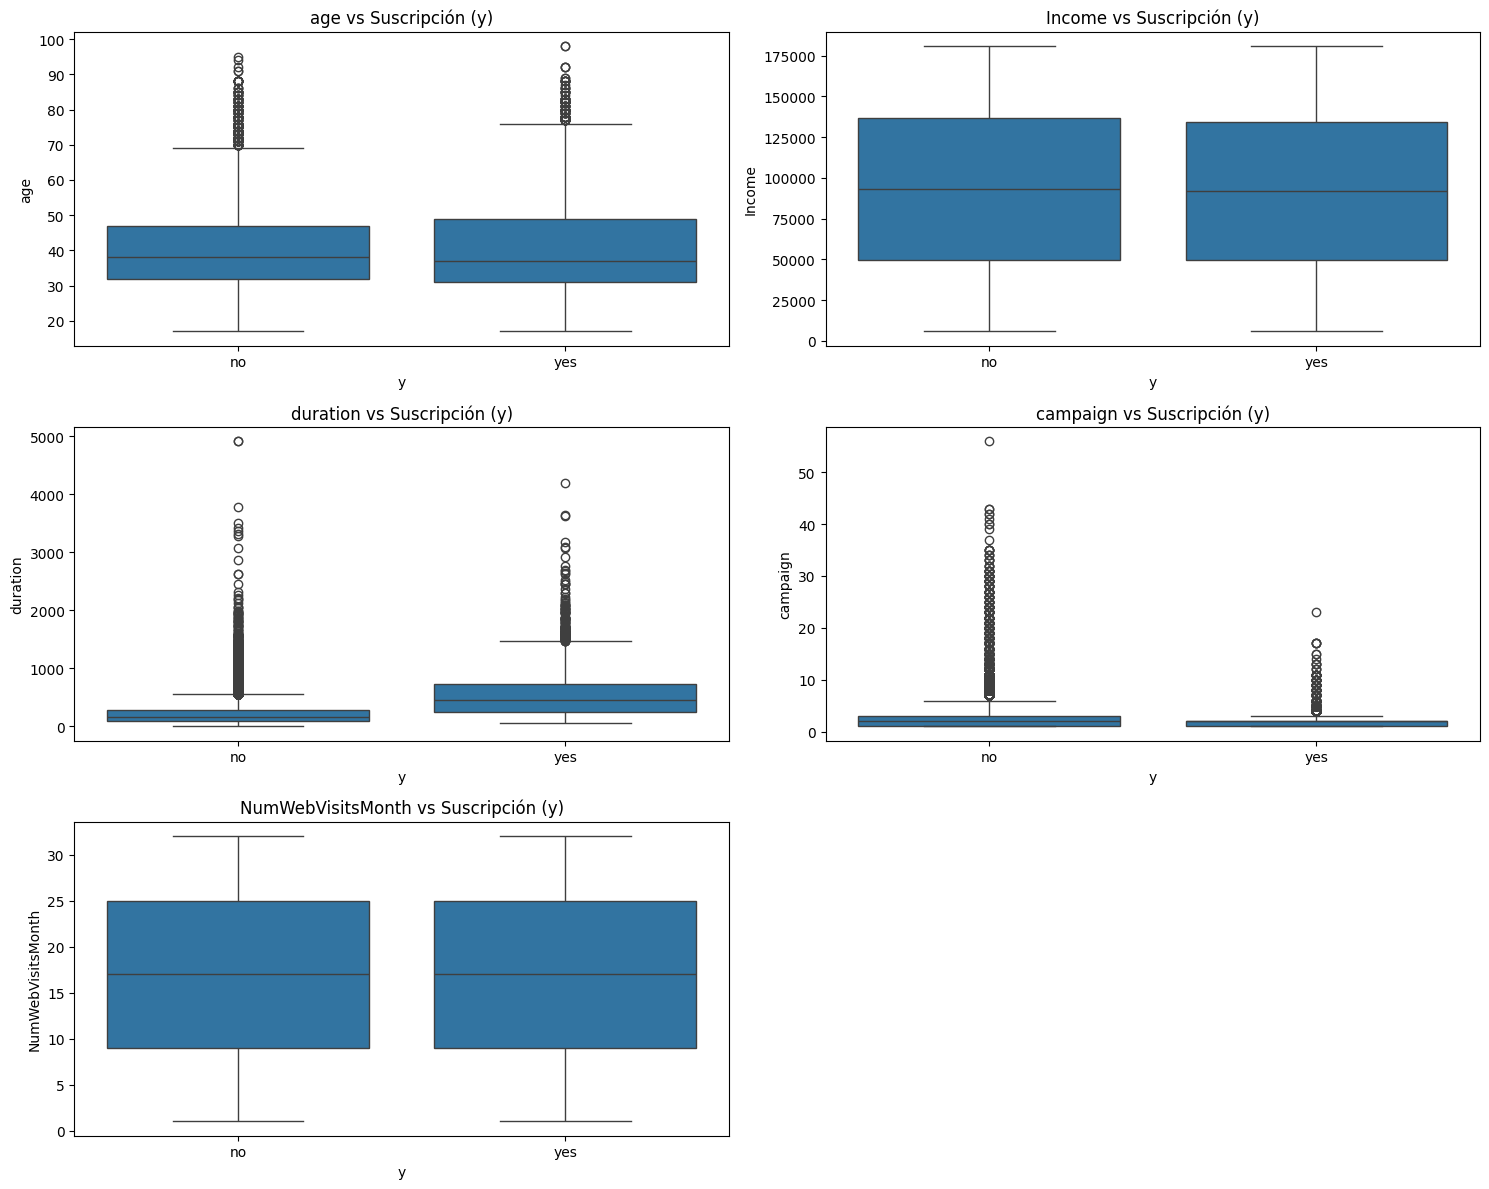

In [21]:
# An√°lisis bivariado de variables num√©ricas vs la variable 'y' (Suscripci√≥n):

#Analizamos si existe alguna relaci√≥n entre cada variable num√©rica (age, income, duration, campaign, NumWebVisitsMonth)
# y la probabilidad de suscribirse (y = "yes"), para detectar posibles patrones predictivos o perfiles m√°s propensos a aceptar la campa√±a.

import matplotlib.pyplot as plt
import seaborn as sns

# Variables num√©ricas a comparar
numeric_vars = ['age', 'Income', 'duration', 'campaign', 'NumWebVisitsMonth']

plt.figure(figsize=(15, 12))

for i, var in enumerate(numeric_vars, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='y', y=var, data=df_merged)
    plt.title(f'{var} vs Suscripci√≥n (y)')

plt.tight_layout()
plt.show()


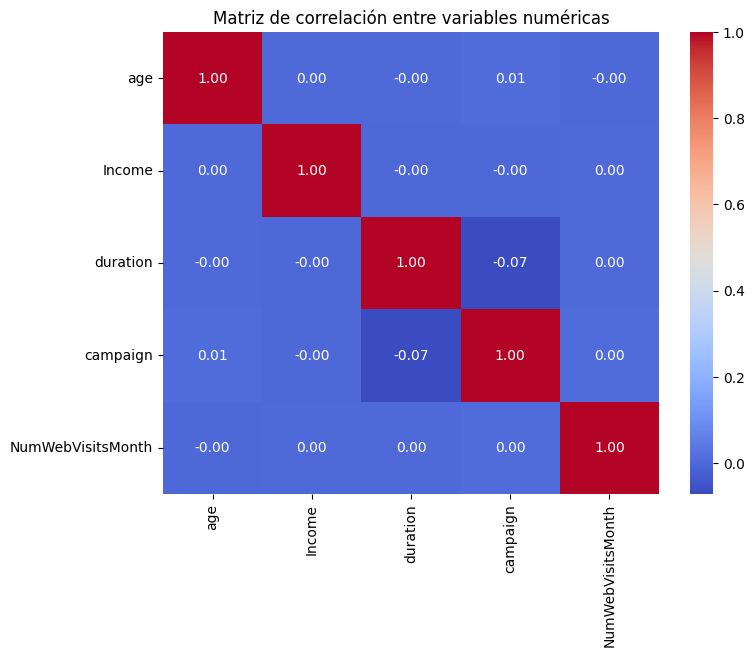

In [22]:
# An√°lisis multivariado o de correlaci√≥n de las variables num√©ricas:

#¬†Objetivo: Evaluar relaciones entre m√∫ltiples variables y cuantificar qu√© tan relacionadas est√°n con el objetivo y.
import seaborn as sns

corr_matrix = df_merged[['age', 'Income', 'duration', 'campaign', 'NumWebVisitsMonth']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlaci√≥n entre variables num√©ricas')
plt.show()

# Conclusi√≥n:

# Relaci√≥n de 'age': La edad no est√° asociada linealmente ni con ingresos, duraci√≥n de llamada, n√∫mero de contactos ni visitas web.
# Relaci√≥n de 'Income': Los ingresos tampoco est√°n correlacionados con ninguna de las variables num√©ricas analizadas.
# Relaci√≥n de 'duration': Hay una relaci√≥n negativa muy d√©bil entre duraci√≥n de llamada y n√∫mero de contactos en la campa√±a.
# Esto podr√≠a sugerir que cuando se contacta m√°s veces, las llamadas tienden a ser un poco m√°s cortas, aunque la relaci√≥n es m√≠nima.
# Relaci√≥n de 'campaign': El n√∫mero de contactos en la campa√±a no est√° asociada linealmente con ninguna variable, 
# salvo la dicha anteriormente con 'duration'.
# Relaci√≥n de 'NumWebVisitsMonth': El n√∫mero de visitas mensuales en la web no est√° linealmente asociada con ninguna variable.

# No existe ninguna correlaci√≥n significativa (ni positiva ni negativa) entre las variables num√©ricas analizadas.
#¬†El √∫nico par con una ligera relaci√≥n negativa es 'duration' y 'campaign', pero su valor (-0.07) sigue siendo 
# demasiado bajo para ser relevante.


/var/folders/48/0cq74lwd20z1gzx1drhf3jg00000gn/T/ipykernel_2515/3137641497.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_age_group = df_merged.groupby('age_group').size()
/var/folders/48/0cq74lwd20z1gzx1drhf3jg00000gn/T/ipykernel_2515/3137641497.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_by_age_group = df_merged[df_merged['y'] == 'yes'].groupby('age_group').size()


Tasa de suscripci√≥n (%) por grupo de edad:
age_group
17-24    20.836013
25-34    11.608902
35-44     8.591036
45-54     8.684699
55-64    15.404603
65-74    42.028986
75-84    52.879581
85-98    47.500000
dtype: float64


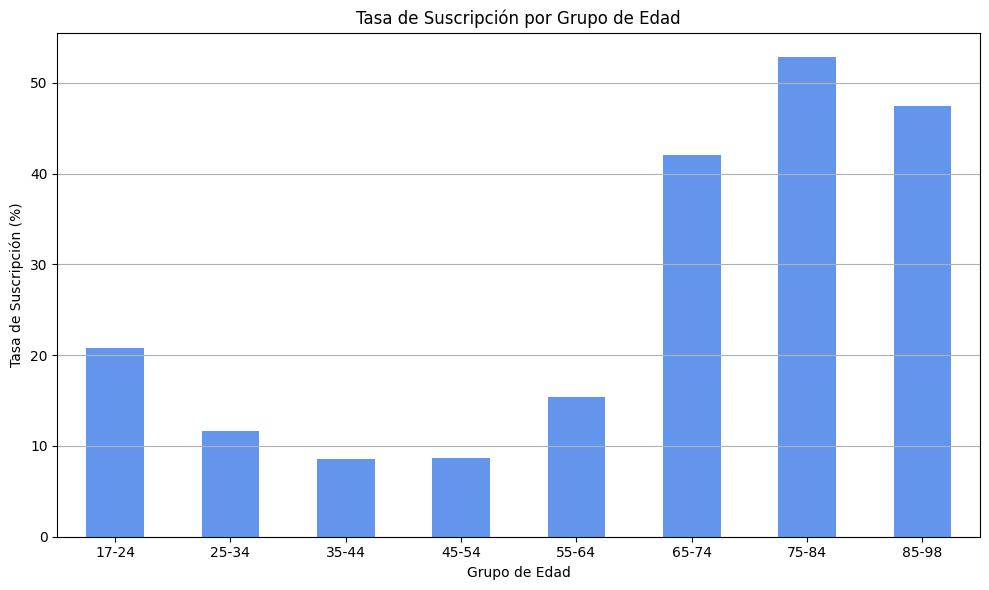

In [23]:
# An√°lisis de la variable 'age' por grupos para analizar si existe alguna relaci√≥n de estos grupos con la suscripci√≥n:

# 1. Definir los rangos de edad
bins = [17, 25, 35, 45, 55, 65, 75, 85, 98]
labels = ['17-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-98']

# 2. Crear columna con grupo de edad
df_merged['age_group'] = pd.cut(df_merged['age'], bins=bins, labels=labels, right=True)

# 3. Calcular total y √©xitos por grupo
total_by_age_group = df_merged.groupby('age_group').size()
success_by_age_group = df_merged[df_merged['y'] == 'yes'].groupby('age_group').size()

# 4. Calcular tasa de suscripci√≥n (%)
success_rate_by_age_group = (success_by_age_group / total_by_age_group * 100).fillna(0)

# 5. Mostrar resultados
print("Tasa de suscripci√≥n (%) por grupo de edad:")
print(success_rate_by_age_group)

# 6. Visualizaci√≥n
plt.figure(figsize=(10,6))
success_rate_by_age_group.plot(kind='bar', color='cornflowerblue')
plt.title('Tasa de Suscripci√≥n por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de Suscripci√≥n (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Conclusi√≥n:

# Los grupos de edad m√°s propensos a suscribirse son '75-84' con un 52.88%, '85-98' con un 47.5% y '65-74' con un 42.03%.
# Se puede concluir que las personas mayores tienen una mayor predisposici√≥n a suscribirse.


/var/folders/48/0cq74lwd20z1gzx1drhf3jg00000gn/T/ipykernel_2515/3660968567.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_income_group = df_merged.groupby('income_group').size()
/var/folders/48/0cq74lwd20z1gzx1drhf3jg00000gn/T/ipykernel_2515/3660968567.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_by_income_group = df_merged[df_merged['y'] == 'yes'].groupby('income_group').size()


Tasa de suscripci√≥n (%) por grupo de ingresos:
income_group
5k-20k       10.827843
20k-40k      11.730382
40k-60k      11.199348
60k-80k      11.767118
80k-100k     11.492628
100k-120k    11.817238
120k-140k    10.769536
140k-160k    10.475406
160k-180k    11.194177
dtype: float64


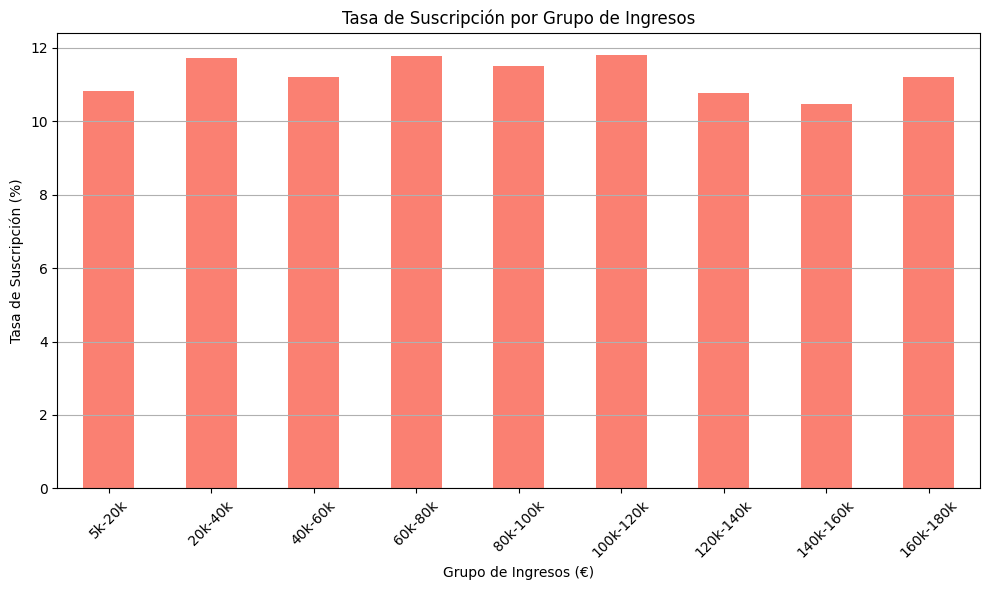

In [24]:
# An√°lisis de la variable 'Income' por grupos para analizar si existe alguna relaci√≥n de estos grupos con la suscripci√≥n:

# 1. Definir los rangos de ingreso
bins = [5000, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180802]
labels = ['5k-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', '140k-160k', '160k-180k']

# 2. Crear columna con grupo de ingreso
df_merged['income_group'] = pd.cut(df_merged['Income'], bins=bins, labels=labels, right=True)

# 3. Calcular total y √©xitos por grupo de ingreso
total_by_income_group = df_merged.groupby('income_group').size()
success_by_income_group = df_merged[df_merged['y'] == 'yes'].groupby('income_group').size()

# 4. Calcular tasa de suscripci√≥n (%)
success_rate_by_income_group = (success_by_income_group / total_by_income_group * 100).fillna(0)

# 5. Mostrar resultados
print("Tasa de suscripci√≥n (%) por grupo de ingresos:")
print(success_rate_by_income_group)

# 6. Visualizaci√≥n
plt.figure(figsize=(10,6))
success_rate_by_income_group.plot(kind='bar', color='salmon')
plt.title('Tasa de Suscripci√≥n por Grupo de Ingresos')
plt.xlabel('Grupo de Ingresos (‚Ç¨)')
plt.ylabel('Tasa de Suscripci√≥n (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Conclusi√≥n:

# Todas las tasas de suscripci√≥n son bastante homog√©neas, por lo que no hay un grupo que destaque.
# El ingreso por s√≠ solo no determina la probabilidad de suscripci√≥n. Esto sugiere que el inter√©s en el producto bancario 
# es relativamente independiente del nivel econ√≥mico, o que el producto tiene un enfoque generalista atractivo para todos los segmentos.


üìä Tasa de suscripci√≥n (%) seg√∫n n√∫mero de hijos peque√±os (Kidhome):
Kidhome
0    11.344124
1    11.096424
2    11.355438
dtype: float64


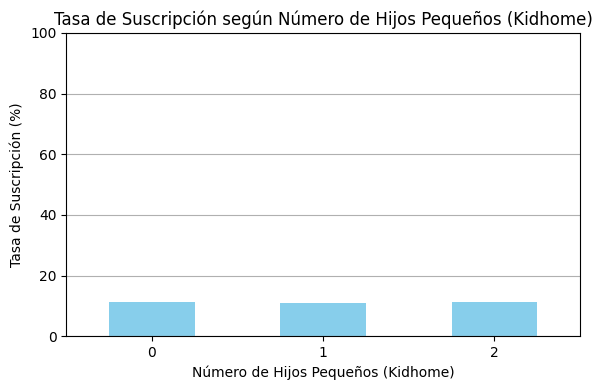

In [25]:
# An√°lisis de la variable 'Kidhome' por grupos para analizar si existe alguna relaci√≥n de estos grupos con la suscripci√≥n:

# Calcular n√∫mero total de registros por valor de Kidhome
total_by_kidhome = df_merged.groupby('Kidhome').size()

# Calcular n√∫mero de suscripciones exitosas por valor de Kidhome
success_by_kidhome = df_merged[df_merged['y'] == 'yes'].groupby('Kidhome').size()

# Calcular la tasa de suscripci√≥n (%)
success_rate_kidhome = (success_by_kidhome / total_by_kidhome * 100).fillna(0)

# Mostrar resultados
print("üìä Tasa de suscripci√≥n (%) seg√∫n n√∫mero de hijos peque√±os (Kidhome):")
print(success_rate_kidhome)

# Visualizaci√≥n
plt.figure(figsize=(6,4))
success_rate_kidhome.plot(kind='bar', color='skyblue')
plt.title('Tasa de Suscripci√≥n seg√∫n N√∫mero de Hijos Peque√±os (Kidhome)')
plt.xlabel('N√∫mero de Hijos Peque√±os (Kidhome)')
plt.ylabel('Tasa de Suscripci√≥n (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Conclusi√≥n:

# La variable 'Kidhome' no influye significativamente en la decisi√≥n de suscribirse. El tener hijos peque√±os no afecta 
# la suscripci√≥n del producto bancario.

üìä Tasa de suscripci√≥n (%) seg√∫n n√∫mero de adolescentes en casa (Teenhome):
Teenhome
0    11.362844
1    11.127349
2    11.305565
dtype: float64


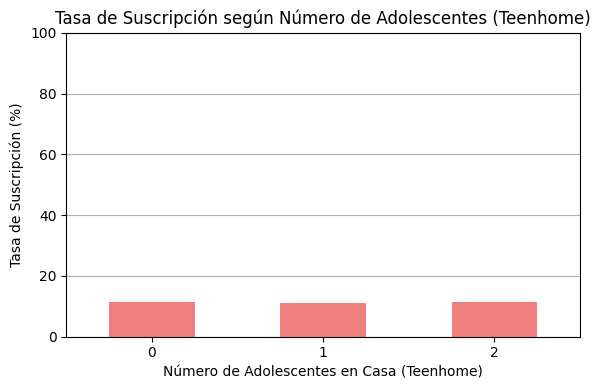

In [26]:
# An√°lisis de la variable 'Teenhome' por grupos para analizar si existe alguna relaci√≥n de estos grupos con la suscripci√≥n:

# Calcular n√∫mero total de registros por valor de Teenhome
total_by_teenhome = df_merged.groupby('Teenhome').size()

# Calcular n√∫mero de suscripciones exitosas por valor de Teenhome
success_by_teenhome = df_merged[df_merged['y'] == 'yes'].groupby('Teenhome').size()

# Calcular la tasa de suscripci√≥n (%)
success_rate_teenhome = (success_by_teenhome / total_by_teenhome * 100).fillna(0)

# Mostrar resultados
print("üìä Tasa de suscripci√≥n (%) seg√∫n n√∫mero de adolescentes en casa (Teenhome):")
print(success_rate_teenhome)

# Visualizaci√≥n
plt.figure(figsize=(6,4))
success_rate_teenhome.plot(kind='bar', color='lightcoral')
plt.title('Tasa de Suscripci√≥n seg√∫n N√∫mero de Adolescentes (Teenhome)')
plt.xlabel('N√∫mero de Adolescentes en Casa (Teenhome)')
plt.ylabel('Tasa de Suscripci√≥n (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Conclusi√≥n:

# Al igual que con 'Kidhome', el n√∫mero de adolescentes en casa ('Teenhome') no parece tener un impacto significativo en la 
# probabilidad de suscripci√≥n.


üìä Tasa de suscripci√≥n (%) seg√∫n grupo de 'pdays':
pdays_group
Reciente         66.034483
Intermedio       58.644860
No contactado     9.241283
dtype: float64


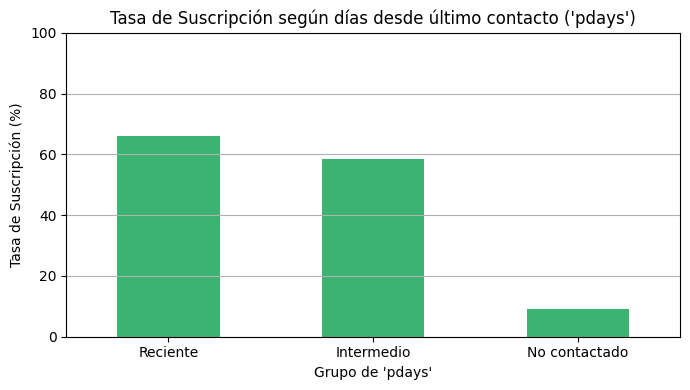

In [27]:
# An√°lisis de la variable 'pdays' por grupos para analizar si existe alguna relaci√≥n de estos grupos con la suscripci√≥n:

# Crear categor√≠as para 'pdays'
def categorize_pdays(pdays):
    if pdays == 999:
        return 'No contactado'
    elif pdays <= 6:
        return 'Reciente'
    elif pdays <= 30:
        return 'Intermedio'
    else:
        return 'Antiguo'

df_merged['pdays_group'] = df_merged['pdays'].apply(categorize_pdays)

# Calcular tasa de suscripci√≥n por grupo
total_by_pdays = df_merged.groupby('pdays_group').size()
success_by_pdays = df_merged[df_merged['y'] == 'yes'].groupby('pdays_group').size()
success_rate_pdays = (success_by_pdays / total_by_pdays * 100).fillna(0).sort_values(ascending=False)

# Mostrar resultados
print("üìä Tasa de suscripci√≥n (%) seg√∫n grupo de 'pdays':")
print(success_rate_pdays)

# Visualizaci√≥n
plt.figure(figsize=(7,4))
success_rate_pdays.plot(kind='bar', color='mediumseagreen')
plt.title("Tasa de Suscripci√≥n seg√∫n d√≠as desde √∫ltimo contacto ('pdays')")
plt.xlabel("Grupo de 'pdays'")
plt.ylabel("Tasa de Suscripci√≥n (%)")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Conclusi√≥n:

# Cuanto m√°s reciente fue el contacto previo, mayor es la tasa de suscripci√≥n. Contactar a los clientes nuevamente en los primeros d√≠as 
# tras un contacto anterior se asocia con un alto √©xito. 
#¬†Los clientes que nunca fueron contactados antes (valor especial 999) presentan una tasa de suscripci√≥n mucho m√°s baja.
#¬†Existe una relaci√≥n fuerte y positiva entre el seguimiento r√°pido y la probabilidad de conversi√≥n.

#¬†La campa√±a parece m√°s efectiva cuando el cliente tiene un historial reciente de contacto. Puede deberse a que estos clientes 
# est√°n m√°s comprometidos, tienen presente la oferta o se sienten m√°s valorados.


üìä Tasa de suscripci√≥n (%) seg√∫n n√∫mero de contactos previos:
previous
0     8.815999
1    21.096693
2    46.564885
3    60.344828
4    54.666667
5    75.000000
6    60.000000
7     0.000000
Name: y, dtype: float64


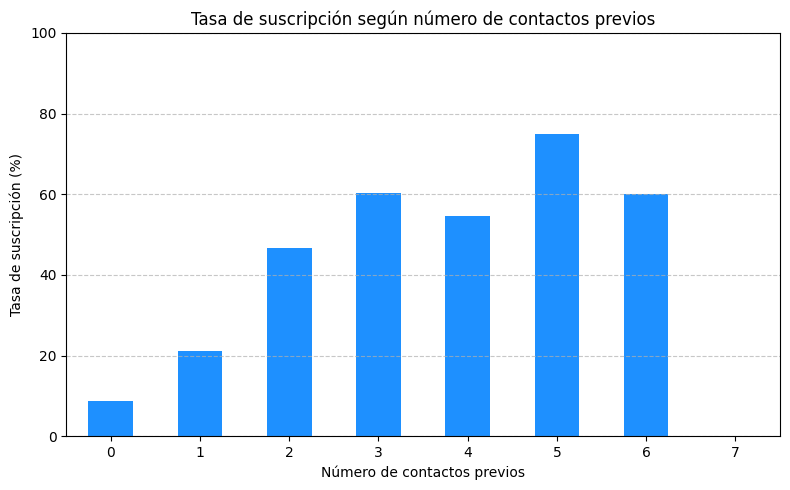

In [28]:
# An√°lisis de la variable 'previous' por grupos para analizar si existe alguna relaci√≥n de estos grupos con la suscripci√≥n:

# Asegurar que 'y' es num√©rica (1 para 'yes', 0 para 'no')
df_merged['y'] = df_merged['y'].map({'yes': 1, 'no': 0})

# Calcular tasa de suscripci√≥n (%) por n√∫mero de contactos previos
subscription_by_previous = df_merged.groupby('previous')['y'].mean() * 100

# Mostrar resultados ordenados
print("üìä Tasa de suscripci√≥n (%) seg√∫n n√∫mero de contactos previos:")
print(subscription_by_previous.sort_index())

# Gr√°fico de barras
plt.figure(figsize=(8,5))
subscription_by_previous.sort_index().plot(kind='bar', color='dodgerblue')
plt.title('Tasa de suscripci√≥n seg√∫n n√∫mero de contactos previos')
plt.xlabel('N√∫mero de contactos previos')
plt.ylabel('Tasa de suscripci√≥n (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Conclusi√≥n:

# Los clientes con 0 contactos previos tienen una tasa muy baja (8.82%), lo que indica que no haber contactado antes 
# reduce la probabilidad de suscripci√≥n.
# La tasa alcanza un pico alto alrededor de 5 contactos previos (75%), sugiriendo que los m√∫ltiples intentos de contacto 
# aumentan mucho las probabilidades de conversi√≥n.

#¬†Hacer seguimientos repetidos con el cliente parece ser una estrategia efectiva para aumentar la tasa de suscripci√≥n.
# Sin embargo, un n√∫mero excesivo de contactos (como 7) no muestra √©xito, posiblemente por pocos datos o rechazo del cliente.
#¬†La empresa podr√≠a plantearse un l√≠mite √≥ptimo de 6 intentos de contacto para maximizar resultados y evitar desgaste.


In [ ]:
#¬†Conclusiones de cada variable del An√°lisis bivariado:

#¬†1. Edad vs Suscripci√≥n
#¬†Observaci√≥n: Las distribuciones de edad entre los que suscriben (yes) y los que no (no) son muy similares, con medianas pr√°cticamente iguales.
# Conclusi√≥n: La edad por s√≠ sola no parece ser un fuerte diferenciador para la probabilidad de suscripci√≥n.

# 2. Ingresos vs Suscripci√≥n
# Observaci√≥n: Las distribuciones y medianas son casi id√©nticas entre ambos grupos.
# Conclusi√≥n: El nivel de ingresos no muestra diferencias significativas entre quienes suscriben y quienes no. Por lo tanto, 
# podr√≠a no ser un predictor √∫til por s√≠ solo.

# 3. Duraci√≥n vs Suscripci√≥n
# Observaci√≥n: La duraci√≥n de la √∫ltima llamada es visiblemente m√°s alta en quienes dijeron ‚Äúyes‚Äù: la mediana es claramente mayor, 
# y la distribuci√≥n muestra colas m√°s largas hacia valores altos en el grupo ‚Äúyes‚Äù.
# Conclusi√≥n: La duraci√≥n de la llamada es un factor fuertemente asociado a la suscripci√≥n; llamadas m√°s largas tienden a terminar 
# en suscripci√≥n.

# 4. Campaign vs Suscripci√≥n
# Observaci√≥n: Los clientes que finalmente suscriben (‚Äúyes‚Äù) tienden a haber recibido menos contactos, mostrando distribuciones 
# con medianas m√°s bajas que el grupo ‚Äúno‚Äù.
# Conclusi√≥n: Un menor n√∫mero de contactos parece estar relacionado con mayor √©xito: insistir demasiado podr√≠a ser contraproducente.

# 5. Visitas Web vs Suscripci√≥n
# Observaci√≥n: Las distribuciones entre ‚Äúyes‚Äù y ‚Äúno‚Äù son muy similares, sin diferencias visibles en medianas ni en rangos.
# Conclusi√≥n: El n√∫mero de visitas al sitio web no parece influir significativamente en la decisi√≥n de suscripci√≥n.

# Resumen del An√°lisis bivariado:

#¬†Duration -> cuanto m√°s larga es la llamada, mayor probabilidad de suscripci√≥n.
#¬†Campaign -> menos intentos, mayor tasa de √©xito.
# Variables con poca o nula relaci√≥n aparente -> 'age', 'Income' y 'NumWebVisitsMonth'.

y                      0          1
job                                
admin.         86.986112  13.013888
blue-collar    93.111664   6.888336
entrepreneur   91.721419   8.278581
housemaid      90.115761   9.884239
management     88.786885  11.213115
retired        74.804469  25.195531
self-employed  89.187374  10.812626
services       91.926958   8.073042
student        68.660022  31.339978
technician     89.154569  10.845431
unemployed     85.606773  14.393227


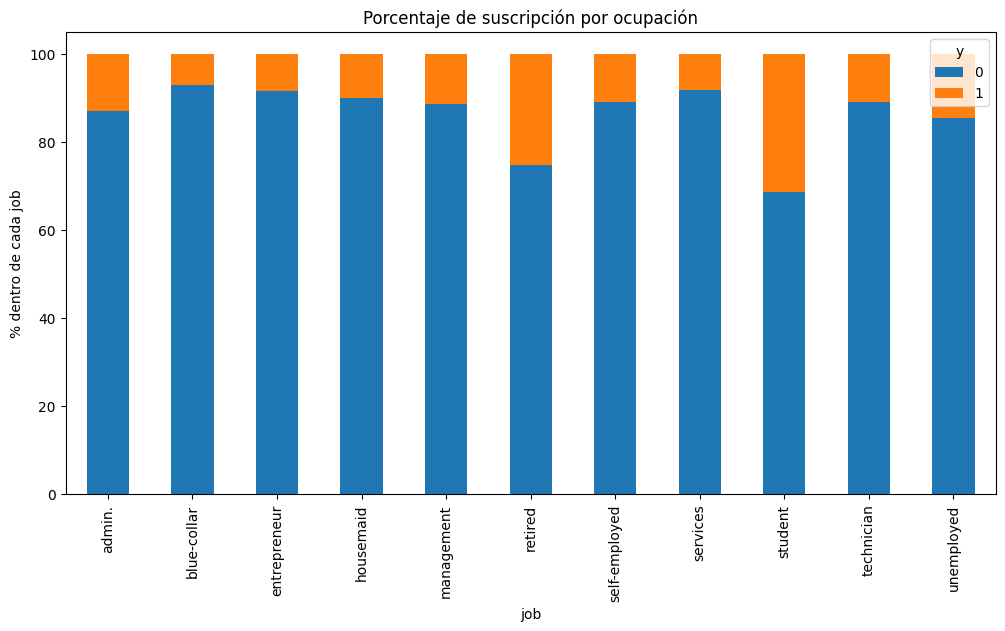

In [29]:
# An√°lisis bivariado de variables categ√≥ricas vs 'y' (Suscripci√≥n):

#¬†1. Identificar profesiones con mayor o menor propensi√≥n a suscribirse.
job_y = df_merged.groupby('job')['y'].value_counts(normalize=True).unstack().fillna(0) * 100
print(job_y)
job_y.plot(kind='bar', stacked=True, figsize=(12,6))
plt.ylabel('% dentro de cada job')
plt.title('Porcentaje de suscripci√≥n por ocupaci√≥n')
plt.show()

# Conclusi√≥n:

# Las profesiones con mayor tasa de suscripci√≥n son 'Student' y 'Retired'.
# Las profesiones con menor tasa de suscripci√≥n son 'Blue-collar', 'Housemaid' y 'Services'.
#¬†Las profesiones de 'Management', 'Self-employed', 'Technician', 'Admin' y 'Entrepeneur' presentan tasas de respuesta intermedias, 
# con un porcentaje de 'yes' moderado pero menor que el de estudiantes o jubilados.


y                 0          1
marital                       
DIVORCED  89.815007  10.184993
MARRIED   89.788069  10.211931
SINGLE    86.071871  13.928129


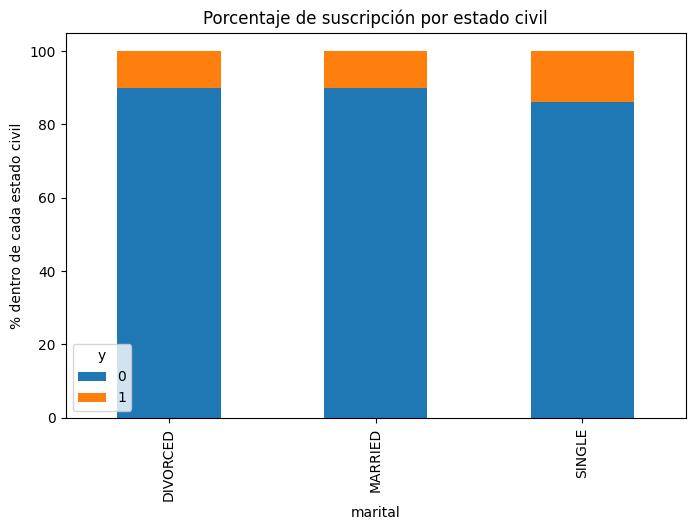

In [30]:
# 2. Identificar estados civiles con mayor o menor tasa de suscripci√≥n:
marital_y = df_merged.groupby('marital')['y'].value_counts(normalize=True).unstack().fillna(0) * 100
print(marital_y)
marital_y.plot(kind='bar', stacked=True, figsize=(8,5))
plt.ylabel('% dentro de cada estado civil')
plt.title('Porcentaje de suscripci√≥n por estado civil')
plt.show()

# Conclusi√≥n:

# Los solteros muestran un mayor inter√©s en el producto, lo que podr√≠a deberse a que tienen m√°s autonom√≠a en la toma de 
# desiciones financieras, o necesidades distintas.
#¬†No hay grandes diferencias entre casados y divorciados, pero ambos muestra menos disposici√≥n que los solteros.
#¬†El gr√°fico refuerza que el estado civil es un factor relevante para segmentar la campa√±a, 
# enfocando el target a los solteros para mejorar las conversiones.

y                            0          1
education                                
basic.4y             89.715335  10.284665
basic.6y             91.869237   8.130763
basic.9y             92.185766   7.814234
high.school          89.158690  10.841310
illiterate           77.777778  22.222222
professional.course  88.679934  11.320066
university.degree    86.260022  13.739978


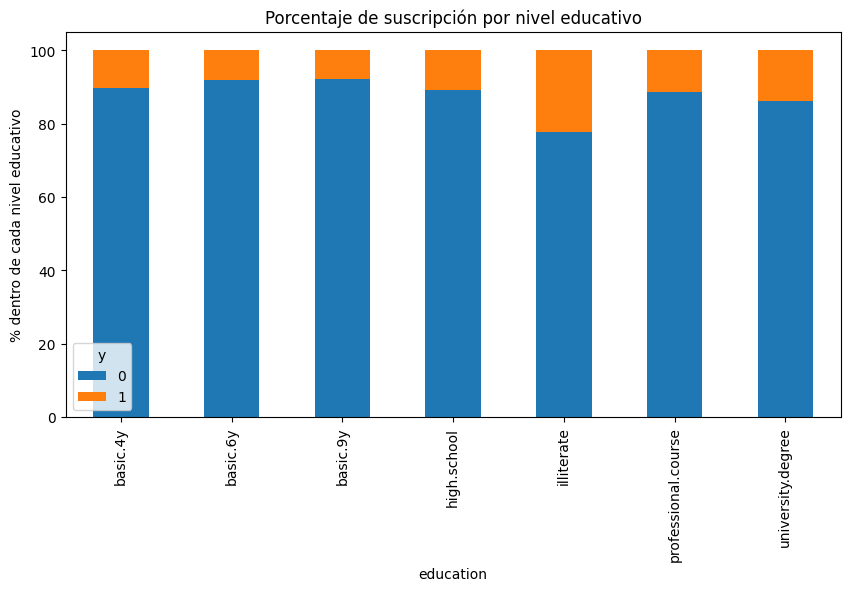

In [31]:
# 3. Identificar si el nivel de educaci√≥n tiene influencia en la tasa de suscripci√≥n:
edu_y = df_merged.groupby('education')['y'].value_counts(normalize=True).unstack().fillna(0) * 100
print(edu_y)
edu_y.plot(kind='bar', stacked=True, figsize=(10,5))
plt.ylabel('% dentro de cada nivel educativo')
plt.title('Porcentaje de suscripci√≥n por nivel educativo')
plt.show()

# Conclusi√≥n:

# Se observa una tendencia clara: a mayor nivel educativo, mayor tasa de suscripci√≥n, especialmente entre quienes tienen 
# estudios universitarios o cursos profesionales.
#¬†Los clientes con educaci√≥n b√°sica (entre 6 y 9 a√±os) muestran menor inter√©s en el producto, lo que podr√≠a deberse a 
# menor acceso a recursos, conocimiento financiero o desconfianza a productos complejos.
# El grupo 'Illiterate' destaca con una tasa inusualmente alta (22.2%). Probablemente el grupo es muy peque√±o y con alta 
# variabilidad estad√≠stica.


y                0          1
housing                      
0        89.145615  10.854385
1        88.372300  11.627700


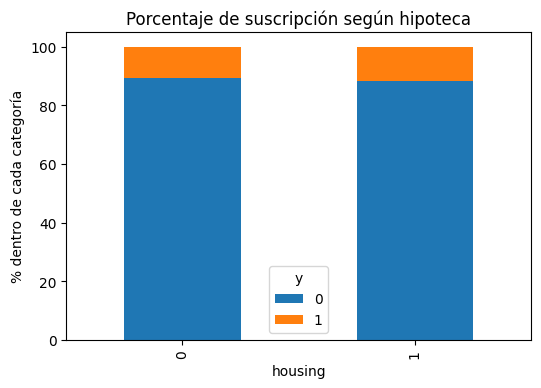

In [32]:
# 4. Identificar si tener obligaciones financieras como el pr√©stamo hipotecario ('housing') influye en la suscripci√≥n:
housing_y = df_merged.groupby('housing')['y'].value_counts(normalize=True).unstack().fillna(0) * 100
print(housing_y)
housing_y.plot(kind='bar', stacked=True, figsize=(6,4))
plt.ylabel('% dentro de cada categor√≠a')
plt.title('Porcentaje de suscripci√≥n seg√∫n hipoteca')
plt.show()

# Conclusi√≥n:

# La tasa de suscripci√≥n es ligeramente mayor en clientes con pr√©stamo hipotecario (housing = 1).
#¬†Al ser una diferencia m√≠nima entre los que tienen y los que no tienen un pr√©stamo hipotecario, no se puede definir que estos grupos 
# sean considerados a la hora de realizar campa√±as con el objetivo de suscripci√≥n.

y             0          1
loan                      
0     88.665990  11.334010
1     89.084507  10.915493


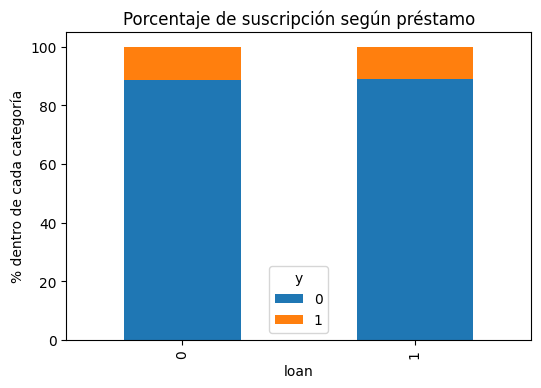

In [33]:
# 5. Identificar si tener obligaciones financieras como otro tipo de pr√©stamos ('loan') influye en la suscripci√≥n:
loan_y = df_merged.groupby('loan')['y'].value_counts(normalize=True).unstack().fillna(0) * 100
print(loan_y)
loan_y.plot(kind='bar', stacked=True, figsize=(6,4))
plt.ylabel('% dentro de cada categor√≠a')
plt.title('Porcentaje de suscripci√≥n seg√∫n pr√©stamo')
plt.show()

# Conclusi√≥n:

# La tasa de suscripci√≥n es ligeramente mayor en clientes que no tienen otro tipo de pr√©stamos (loan = 0).
#¬†Al ser una diferencia m√≠nima entre los que tienen y los que no tienen otros tipos de pr√©stamos, no se puede definir que estos grupos
# sean considerados a la hora de realizar campa√±as con el objetivo de suscripci√≥n.

Tasa de √©xito (%) por tipo de contacto:
contact
cellular     14.743028
telephone     5.158934
dtype: float64


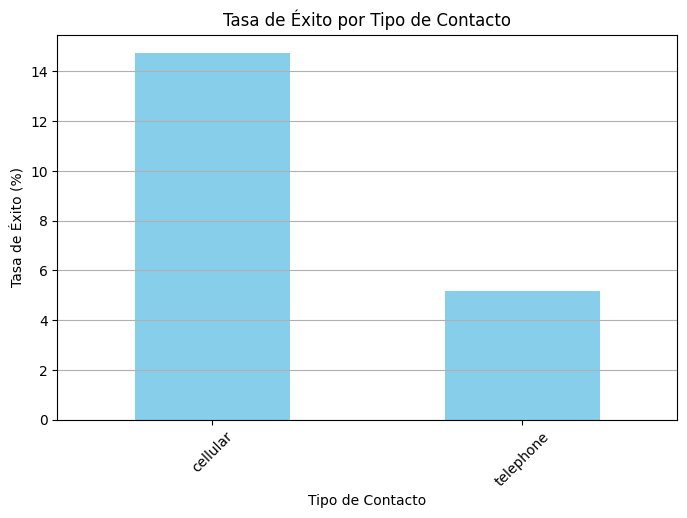

In [41]:
# 6. Identificar si la forma de contacto ('contact') influye en la suscripci√≥n:

# Asegurarse que 'y' es num√©rico (0 y 1)
df_merged['y'] = df_merged['y'].astype(int)

# Total registros por tipo de contacto
total_by_contact = df_merged.groupby('contact').size()

# √âxitos (y == 1) por tipo de contacto
success_by_contact = df_merged[df_merged['y'] == 1].groupby('contact').size()

# Tasa de √©xito (%)
success_rate = (success_by_contact / total_by_contact * 100).fillna(0).sort_values(ascending=False)

print("Tasa de √©xito (%) por tipo de contacto:")
print(success_rate)

# Gr√°fico
plt.figure(figsize=(8,5))
success_rate.plot(kind='bar', color='skyblue')
plt.title('Tasa de √âxito por Tipo de Contacto')
plt.xlabel('Tipo de Contacto')
plt.ylabel('Tasa de √âxito (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Conclusi√≥n:

# El tipo de contacto con mayor tasa de √©xito es 'cellular', con un 14.74% de suscripciones.
# La tasa de √©xito con 'cellular' es casi 3 veces mayor que la de 'telephone', lo que indica una influencia significativamente 
# m√°s alta en la suscripci√≥n del producto.

üìä Tasa de √©xito (%) seg√∫n resultado de campa√±a anterior (poutcome):
poutcome
SUCCESS        65.320334
FAILURE        14.234477
NONEXISTENT     8.815999
dtype: float64


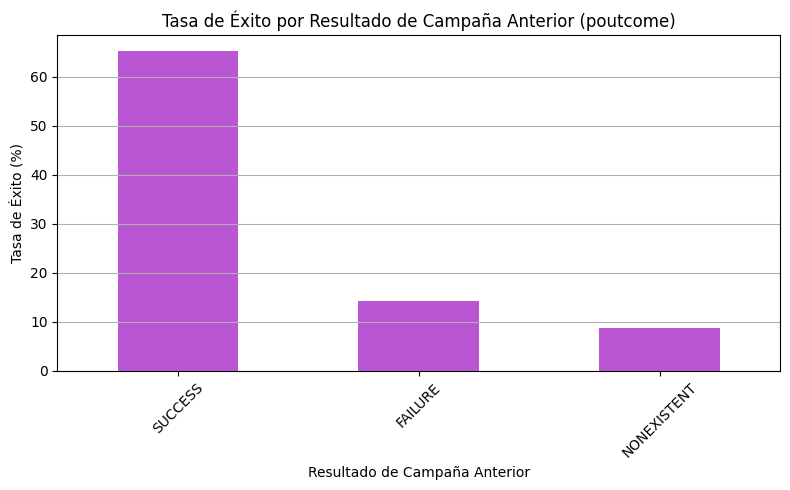

In [43]:
# 7. Identificar si el resultado de la campa√±a previa ('poutcome') influye en la suscripci√≥n:

# Asegurarse que 'y' es num√©rico (0 y 1)
df_merged['y'] = df_merged['y'].astype(int)

# Total de clientes por valor de 'poutcome'
total_by_poutcome = df_merged.groupby('poutcome').size()

# Total de suscripciones exitosas (y == 1) por 'poutcome'
success_by_poutcome = df_merged[df_merged['y'] == 1].groupby('poutcome').size()

# Calcular tasa de √©xito (%)
success_rate_poutcome = (success_by_poutcome / total_by_poutcome * 100).fillna(0).sort_values(ascending=False)

# Mostrar resultados
print("üìä Tasa de √©xito (%) seg√∫n resultado de campa√±a anterior (poutcome):")
print(success_rate_poutcome)

# Visualizaci√≥n
plt.figure(figsize=(8,5))
success_rate_poutcome.plot(kind='bar', color='mediumorchid')
plt.title('Tasa de √âxito por Resultado de Campa√±a Anterior (poutcome)')
plt.xlabel('Resultado de Campa√±a Anterior')
plt.ylabel('Tasa de √âxito (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Conclusi√≥n:

# Los clientes que participaron con √©xito en una campa√±a anterior (SUCCESS) tienen una tasa de suscripci√≥n del 65.32% en la campa√±a actual,
# lo que representa una influencia muy fuerte y positiva.
# En contraste, quienes fallaron en una campa√±a previa (FAILURE) solo convierten en un 14.23%, un valor moderadamente bajo.
# Los clientes que no participaron en ninguna campa√±a anterior (NONEXISTENT) tienen la tasa m√°s baja: 8.82%,
# lo que indica que el contacto previo, especialmente exitoso, aumenta notablemente la probabilidad de suscripci√≥n.

# El historial positivo de interacci√≥n con campa√±as anteriores predice fuertemente el √©xito actual.
#¬†La falta de contacto previo (nonexistent) implica menor conocimiento del producto o menor inter√©s, afectando negativamente.

üìä Tasa de suscripci√≥n (%) seg√∫n historial de impago (default):
default
0    12.864534
1     0.000000
dtype: float64


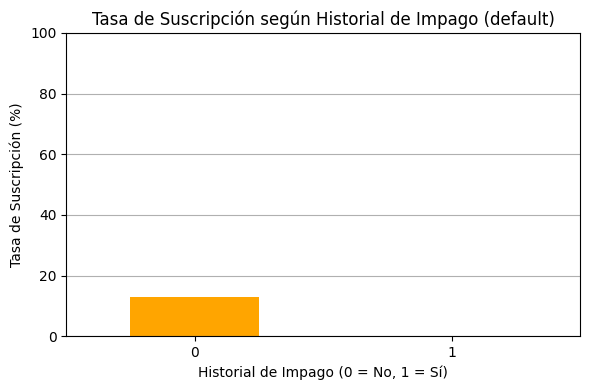

In [ ]:
# 8. Identificar si el historial de incumplimiento de pagos influye en la suscripci√≥n:

# Calcular total de clientes por grupo de default
total_by_default = df_merged.groupby('default').size()

# Calcular n√∫mero de suscripciones exitosas por grupo
success_by_default = df_merged[df_merged['y'] == 'yes'].groupby('default').size()

# Calcular tasa de suscripci√≥n en porcentaje
success_rate_default = (success_by_default / total_by_default * 100).fillna(0)

# Mostrar resultados
print("üìä Tasa de suscripci√≥n (%) seg√∫n historial de impago (default):")
print(success_rate_default)

# Visualizaci√≥n
plt.figure(figsize=(6,4))
success_rate_default.plot(kind='bar', color='orange')
plt.title('Tasa de Suscripci√≥n seg√∫n Historial de Impago (default)')
plt.xlabel('Historial de Impago (0 = No, 1 = S√≠)')
plt.ylabel('Tasa de Suscripci√≥n (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Conclusi√≥n:

# Ning√∫n cliente con historial de impago se ha suscrito al producto bancario.
#¬†Los clientes sin historial de impago tienen una tasa de suscripci√≥n significativa del 12.86%.
#¬†Esta diferencia extrema indica que el historial crediticio ('default') tiene un fuerte impacto negativo sobre 
# la probabilidad de aceptaci√≥n de la oferta.

#¬†Los clientes con 'default = 1' representan un perfil de alto riesgo, y probablemente son descartados o no interesados por las campa√±as.



In [ ]:
# üìç Punto de partida: El 89% de los clientes no suscribi√≥ el producto, mientras que el 11% s√≠ que lo hizo.

# üîé Conclusi√≥n final sobre el an√°lisis bivariado de las variables (num√©ricas y categ√≥ricas):

# Ante el an√°lisis realizado de las variables num√©ricas y categ√≥ricas con su influencia en la suscripci√≥n, podemos afirmar que los siguientes
# grupos, caracter√≠sticas y segmentaciones deben ser incluidas en la realizaci√≥n de pr√≥ximas campa√±as con el objetivo de suscripci√≥n, 
# al aumentar su tasa de √©xito. Cabe destacar que otros grupos, caracter√≠sticas o segmentaciones pueden ser relevantes para una segunda campa√±a,
# pues aunque tengan menor tasa de √©xito que los incluidos en la primera campa√±a, podremos obtener mayor n√∫mero de suscripciones realizando 
# una segunda campa√±a:

# üéØ Grupos, segmentaciones y caracter√≠sticas de la Campa√±a "√âxito Garantizado":

# 1. Cuanto m√°s larga sea la llamada, m√°s probabilidad existir√° de convertirla en suscripci√≥n.
#¬†2. Establecer un rango √≥ptimo de contactos por cliente de entre 3 y 6. Si el cliente no se ha suscrito tras los 6 contactos, eliminar. 
# En caso de que no se haya suscrito y el n√∫mero de contactos sea inferior a 6, seguir contactando. No exceder en ning√∫n caso los 6 contactos.
# 3. Si el cliente ya ha sido contactado, no deben pasar m√°s de 30 d√≠as en volverse a producir el siguiente contacto.
# 4. Segmentaci√≥n por edad: de 65 a√±os en adelante. 
# 5. Segmentaci√≥n por Profesiones: 'Student' y 'Retired'.
#¬†6. Segmentaci√≥n por Estado Civil: 'Solteros'.
# 7. Segmentaci√≥n por Nivel Educativo: 'University Degree', 'Professional Courses' e 'Illiterate'.
# 8. La forma de contactar al cliente debe ser por 'cellular'.
# 9. Clientes con el Resultado de la campa√±a anterior 'Success'.
# 10. Clientes sin historial de impagos ('default' = 0).

In [44]:
df_merged.head()

age        job  marital    education  \
ID                                                                            
089b39d8-e4d0-461b-87d4-814d71e0e079   NaN  housemaid  MARRIED     basic.4y   
e9d37224-cb6f-4942-98d7-46672963d097  57.0   services  MARRIED  high.school   
3f9f49b5-e410-4948-bf6e-f9244f04918b  37.0   services  MARRIED  high.school   
9991fafb-4447-451a-8be2-b0df6098d13e  40.0     admin.  MARRIED     basic.6y   
eca60b76-70b6-4077-80ba-bc52e8ebb0eb  56.0   services  MARRIED  high.school   

                                      default  housing  loan    contact  \
ID                                                                        
089b39d8-e4d0-461b-87d4-814d71e0e079        0        0     0  telephone   
e9d37224-cb6f-4942-98d7-46672963d097     <NA>        0     0  telephone   
3f9f49b5-e410-4948-bf6e-f9244f04918b        0        1     0  telephone   
9991fafb-4447-451a-8be2-b0df6098d13e        0        0     0  telephone   
eca60b76-70b6-4077-80ba-bc52e8ebb0eb        0        0     1  telephone   

                                      duration  campaign  pdays  previous  \
ID                                                                          
089b39d8-e4d0-461b-87d4-814d71e0e079       261         1    999         0   
e9d37224-cb6f-4942-98d7-46672963d097       149         1    999         0   
3f9f49b5-e410-4948-bf6e-f9244f04918b       226         1    999         0   
9991fafb-4447-451a-8be2-b0df6098d13e       151         1    999         0   
eca60b76-70b6-4077-80ba-bc52e8ebb0eb       307         1    999         0   

                                         poutcome  emp.var.rate  \
ID                                                                
089b39d8-e4d0-461b-87d4-814d71e0e079  NONEXISTENT           1.1   
e9d37224-cb6f-4942-98d7-46672963d097  NONEXISTENT           1.1   
3f9f49b5-e410-4948-bf6e-f9244f04918b  NONEXISTENT           1.1   
9991fafb-4447-451a-8be2-b0df6098d13e  NONEXISTENT           1.1   
eca60b76-70b6-4077-80ba-bc52e8ebb0eb  NONEXISTENT           1.1   

                                      cons.price.idx  cons.conf.idx  \
ID                                                                    
089b39d8-e4d0-461b-87d4-814d71e0e079             NaN            NaN   
e9d37224-cb6f-4942-98d7-46672963d097             NaN            NaN   
3f9f49b5-e410-4948-bf6e-f9244f04918b             NaN            NaN   
9991fafb-4447-451a-8be2-b0df6098d13e             NaN            NaN   
eca60b76-70b6-4077-80ba-bc52e8ebb0eb             NaN            NaN   

                                      euribor3m  nr.employed  y  \
ID                                                                
089b39d8-e4d0-461b-87d4-814d71e0e079        NaN       5191.0  0   
e9d37224-cb6f-4942-98d7-46672963d097        NaN       5191.0  0   
3f9f49b5-e410-4948-bf6e-f9244f04918b        NaN       5191.0  0   
9991fafb-4447-451a-8be2-b0df6098d13e        NaN       5191.0  0   
eca60b76-70b6-4077-80ba-bc52e8ebb0eb        NaN       5191.0  0   

                                                    date  latitude  longitude  \
ID                                                                              
089b39d8-e4d0-461b-87d4-814d71e0e079       2-agosto-2019    41.495    -71.233   
e9d37224-cb6f-4942-98d7-46672963d097  14-septiembre-2016    34.601    -83.923   
3f9f49b5-e410-4948-bf6e-f9244f04918b     15-febrero-2019    34.939    -94.847   
9991fafb-4447-451a-8be2-b0df6098d13e   29-noviembre-2015    49.041    -70.308   
eca60b76-70b6-4077-80ba-bc52e8ebb0eb       29-enero-2017    38.033   -104.463   

                                      Income  Kidhome  Teenhome Dt_Customer  \
ID                                                                            
089b39d8-e4d0-461b-87d4-814d71e0e079  161770        1         0  2012-04-04   
e9d37224-cb6f-4942-98d7-46672963d097   85477        1         1  2012-12-30   
3f9f49b5-e410-4948-bf6e-f9244f04918b  147233        1         1  2012-02-02   
9991fafb-4447-451a